In [247]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [248]:
df = sns.load_dataset("titanic")

In [249]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Drop the irrelevant columns from the data set

In [250]:
df.drop(columns=['embark_town',"alive","alone","deck","adult_male","who","class"],axis=1,inplace=True)


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


checking for null values

In [252]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

Handling the null values

In [253]:
df['age']=df['age'].fillna(df['age'].mean())

In [254]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [255]:
df['embarked']=df['embarked'].fillna("s")

In [256]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [257]:
df.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [258]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [259]:
df['survived']=df['survived'].astype("category")
df['pclass']=df['pclass'].astype("category")
df['sibsp']=df['sibsp'].astype("category")
df['parch']=df['parch'].astype("category")

In [260]:
df.dtypes

survived    category
pclass      category
sex           object
age          float64
sibsp       category
parch       category
fare         float64
embarked      object
dtype: object

Out of 891 62 people died in the accident

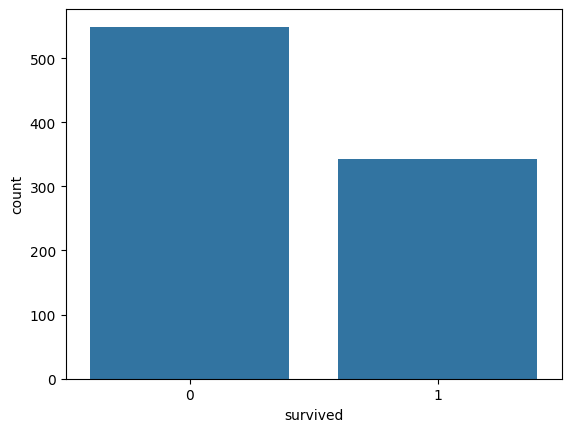

In [261]:
sns.countplot(x=df['survived'])
death_percent=round((df['survived'].value_counts().values[0]/891)*100)
print(f"Out of 891 {death_percent} people died in the accident")

sex
male      64.758698
female    35.241302
Name: count, dtype: float64


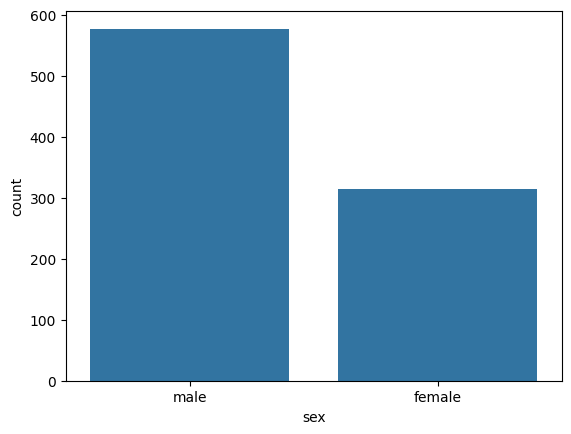

In [262]:
sns.countplot(x=df['sex'])
print((df['sex'].value_counts()/891)*100)

pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


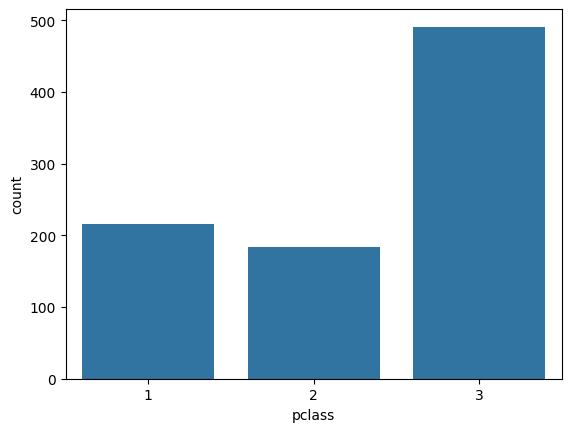

In [263]:
sns.countplot(x=df['pclass'])
print((df['pclass'].value_counts()/891)*100)

sibsp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


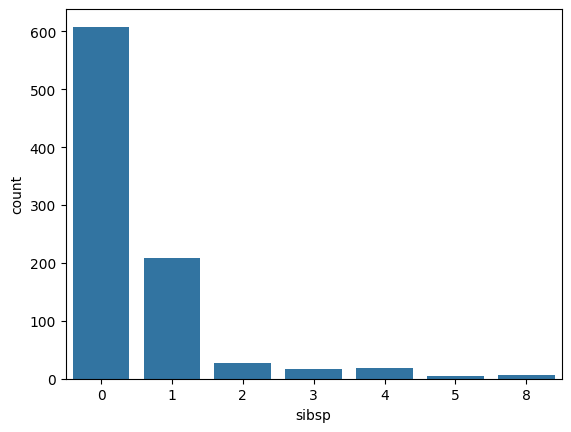

In [264]:
sns.countplot(x=df['sibsp'])
print((df['sibsp'].value_counts()/891)*100)

parch
0    76.094276
1    13.243547
2     8.978676
3     0.561167
5     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


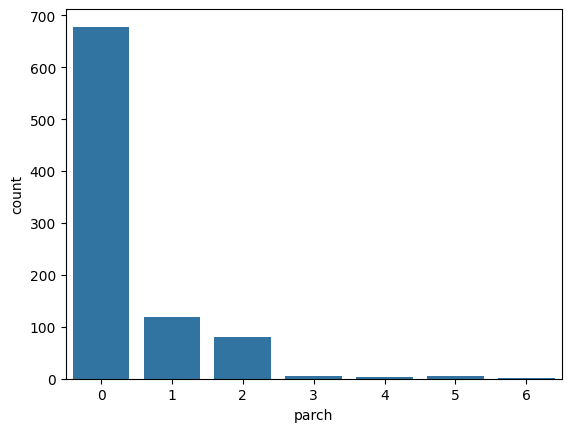

In [265]:
sns.countplot(x=df['parch'])
print((df['parch'].value_counts()/891)*100)

<Axes: xlabel='age', ylabel='Density'>

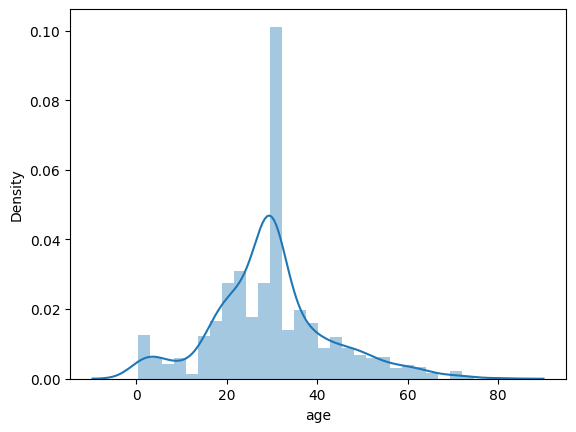

In [266]:
sns.distplot(df['age'])

<Axes: ylabel='age'>

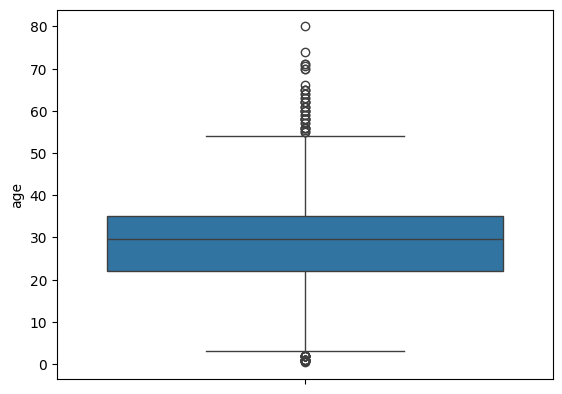

In [267]:
sns.boxplot(df['age'])

In [268]:
print("People with age in between 60 and 70 are",df[(df['age']>60) & (df['age']<70)].shape[0])
print("People with age greater than 70 and 75 are",df[(df['age']>=70) & (df['age']<=75)].shape[0])
print("People with age greater than 75 are",df[df['age']>75].shape[0])
print("People with age between 0 and 1 are",df[df['age']<1].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1
People with age between 0 and 1 are 7


<Axes: xlabel='fare', ylabel='Density'>

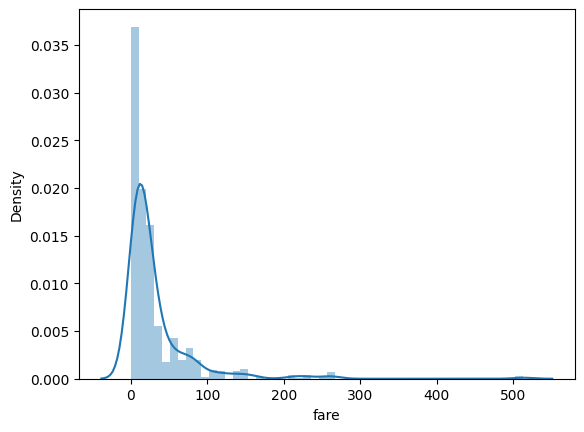

In [269]:
sns.distplot(df['fare'])

<Axes: ylabel='fare'>

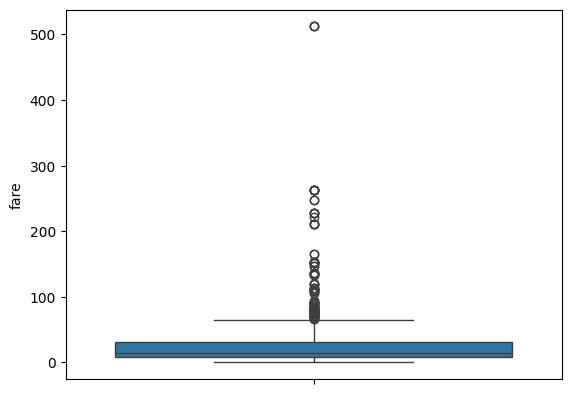

In [270]:
sns.boxplot(df['fare'])

In [271]:
df['fare'].quantile([0.25,0.50,0.75,1.0])

0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: fare, dtype: float64

In [272]:
print("People with fare in between $200 and $300",df[(df['fare']>200) & (df['fare']<300)].shape[0])
print("People with fare in greater than $300",df[df['fare']>300].shape[0])

People with fare in between $200 and $300 17
People with fare in greater than $300 3


highly skewd data with a lot of people have tickets in cheaper side
outlier are there in data  

In [273]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

survived,0,1
pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


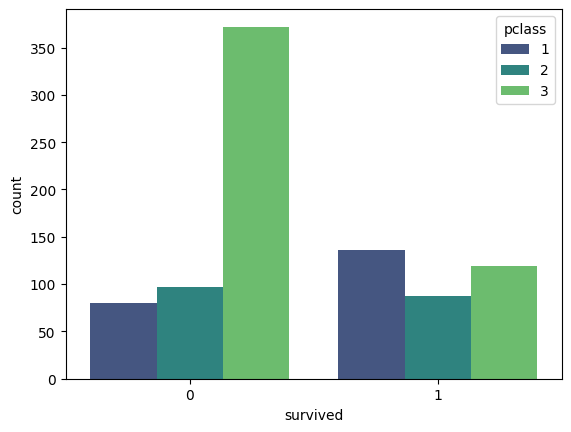

In [274]:
sns.countplot(data=df,x="survived",hue="pclass",palette="viridis")

pd.crosstab(df['pclass'], df['survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

survived,0,1
sex,,
female,25.8,74.2
male,81.1,18.9


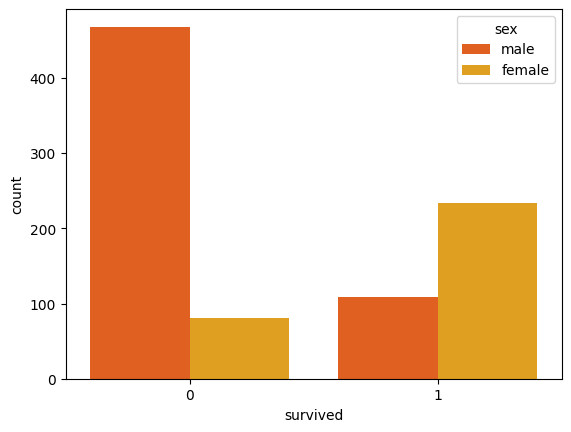

In [275]:
sns.countplot(data = df,x="survived",hue="sex",palette="autumn")

pd.crosstab(df['sex'], df['survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

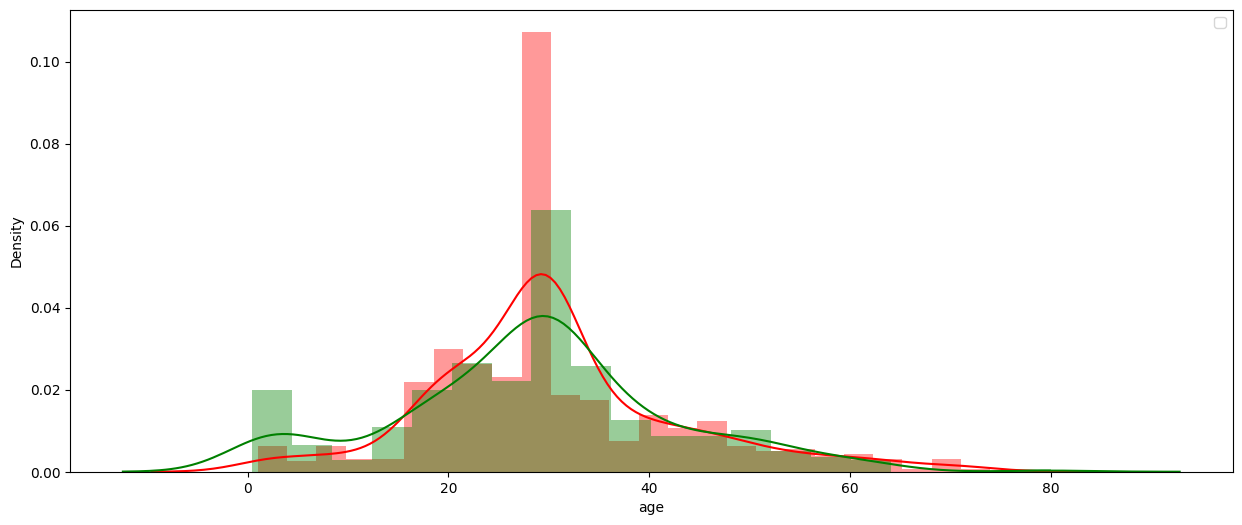

In [276]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['survived']==0]['age'],color="red")
sns.distplot(df[df['survived']==1]['age'],color="green")
plt.legend()

<Axes: xlabel='fare', ylabel='Density'>

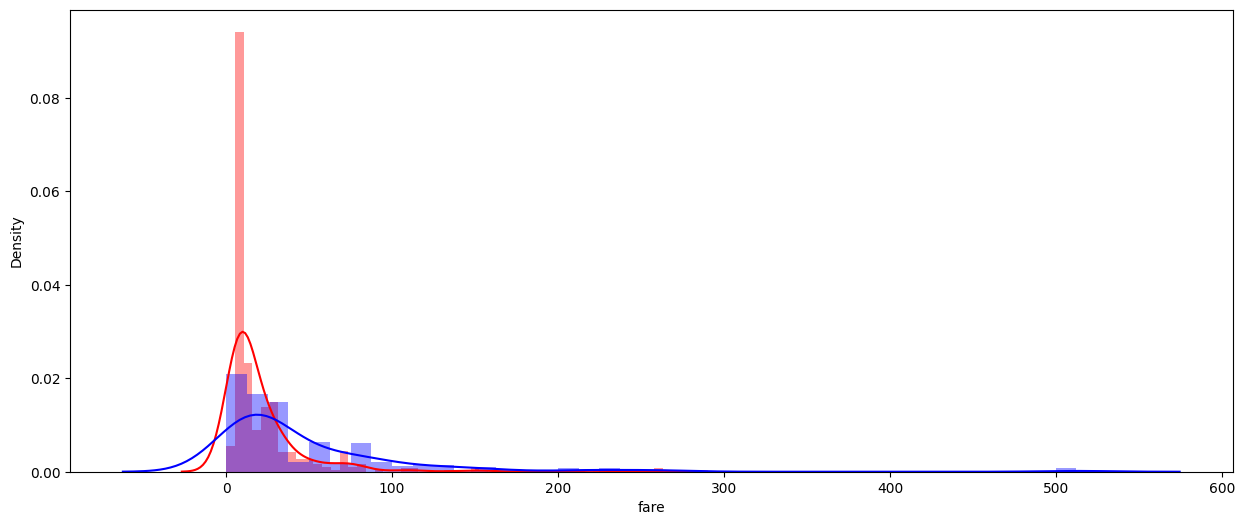

In [277]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['survived']==0]['fare'],color="red")
sns.distplot(df[df['survived']==1]['fare'],color="blue")

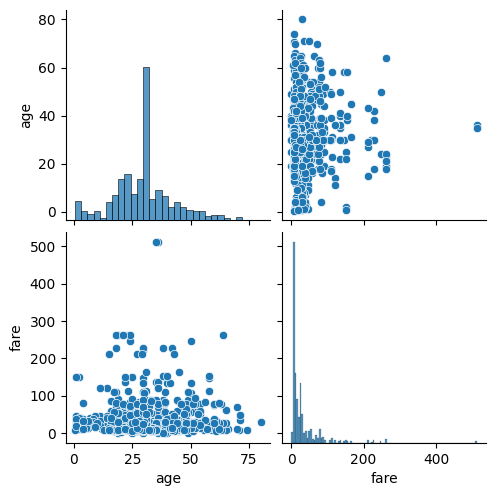

In [278]:
sns.pairplot(df)

In [279]:
num_col = df[["age",'fare']]

In [280]:
num_col

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


<Axes: >

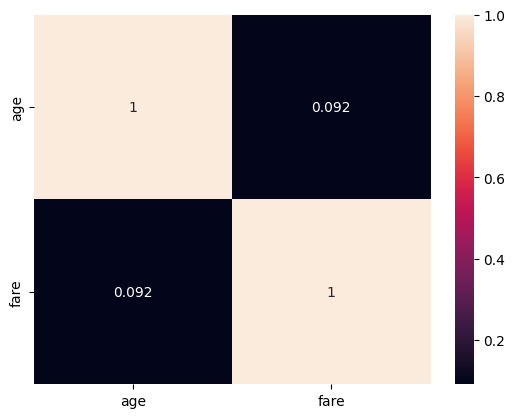

In [281]:
sns.heatmap(num_col.corr(),annot=True)

In [282]:
pd.get_dummies(data=df, columns=['pclass','sex','embarked'])

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_s
0,0,22.000000,1,0,7.2500,False,False,True,False,True,False,False,True,False
1,1,38.000000,1,0,71.2833,True,False,False,True,False,True,False,False,False
2,1,26.000000,0,0,7.9250,False,False,True,True,False,False,False,True,False
3,1,35.000000,1,0,53.1000,True,False,False,True,False,False,False,True,False
4,0,35.000000,0,0,8.0500,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,False,True,False,False,True,False
887,1,19.000000,0,0,30.0000,True,False,False,True,False,False,False,True,False
888,0,29.699118,1,2,23.4500,False,False,True,True,False,False,False,True,False
889,1,26.000000,0,0,30.0000,True,False,False,False,True,True,False,False,False


In [283]:
df=pd.get_dummies(data=df, columns=['pclass','sex','embarked'])

In [284]:
df

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_s
0,0,22.000000,1,0,7.2500,False,False,True,False,True,False,False,True,False
1,1,38.000000,1,0,71.2833,True,False,False,True,False,True,False,False,False
2,1,26.000000,0,0,7.9250,False,False,True,True,False,False,False,True,False
3,1,35.000000,1,0,53.1000,True,False,False,True,False,False,False,True,False
4,0,35.000000,0,0,8.0500,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,False,True,False,False,True,False
887,1,19.000000,0,0,30.0000,True,False,False,True,False,False,False,True,False
888,0,29.699118,1,2,23.4500,False,False,True,True,False,False,False,True,False
889,1,26.000000,0,0,30.0000,True,False,False,False,True,True,False,False,False


<Axes: >

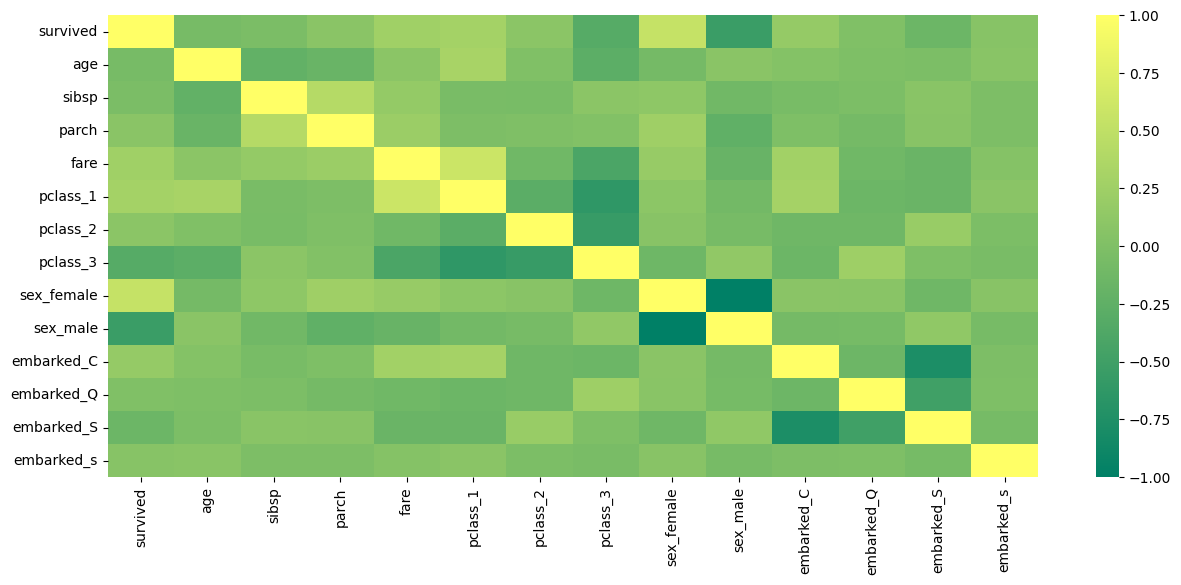

In [285]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='summer')